# Bài tập K-Means Clustering - Phân cụm khu vực giao thông

## Mục tiêu
1. Áp dụng thuật toán K-means để phân cụm các khu vực với K = 3
2. Áp dụng phương pháp Elbow để xác định K tối ưu (K = 1 -> 9)

**Lưu ý:** Chỉ sử dụng numpy, pandas, và matplotlib (không dùng sklearn theo yêu cầu đề bài)


## Import thư viện

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from typing import Tuple, List
import warnings
warnings.filterwarnings('ignore')


## Dữ liệu ban đầu

Dữ liệu gồm 8 khu vực (KV0-KV7) với 2 đặc trưng:
- Lưu lượng giao thông (số lượng xe)
- Diện tích (km²)

In [2]:
# Dữ liệu từ bảng đề bài
data = {
    'Ma_KV': ['KV0', 'KV1', 'KV2', 'KV3', 'KV4', 'KV5', 'KV6', 'KV7'],
    'Luu_luong_giao_thong': [8000, 3000, 12000, 2000, 5000, 6000, 15000, 4000],
    'Dien_tich_km2': [5, 3, 7, 2, 5.5, 6, 8, 3]
}

# Tạo DataFrame
df = pd.DataFrame(data)
print("Dữ liệu ban đầu:")
print(df)
print(f"\nKích thước: {df.shape}")
print(f"\nThống kê mô tả:")
print(df[['Luu_luong_giao_thong', 'Dien_tich_km2']].describe())

Dữ liệu ban đầu:
  Ma_KV  Luu_luong_giao_thong  Dien_tich_km2
0   KV0                  8000            5.0
1   KV1                  3000            3.0
2   KV2                 12000            7.0
3   KV3                  2000            2.0
4   KV4                  5000            5.5
5   KV5                  6000            6.0
6   KV6                 15000            8.0
7   KV7                  4000            3.0

Kích thước: (8, 3)

Thống kê mô tả:
       Luu_luong_giao_thong  Dien_tich_km2
count              8.000000       8.000000
mean            6875.000000       4.937500
std             4549.332761       2.111829
min             2000.000000       2.000000
25%             3750.000000       3.000000
50%             5500.000000       5.250000
75%             9000.000000       6.250000
max            15000.000000       8.000000


## Chuẩn bị dữ liệu

Trích xuất features và chuẩn hóa dữ liệu để đảm bảo các đặc trưng có scale tương đương

In [3]:
# Trích xuất features
X_original = df[['Luu_luong_giao_thong', 'Dien_tich_km2']].values

def standardize(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    X_scaled = (X - mean) / std
    return X_scaled, mean, std

def inverse_standardize(X_scaled, mean, std):
    return X_scaled * std + mean

# Chuẩn hóa dữ liệu
X_scaled, data_mean, data_std = standardize(X_original)

print("Dữ liệu gốc:")
print(X_original)
print("\nDữ liệu sau chuẩn hóa:")
print(X_scaled)
print(f"\nMean của dữ liệu chuẩn hóa: {X_scaled.mean(axis=0)}")
print(f"Std của dữ liệu chuẩn hóa: {X_scaled.std(axis=0)}")
print(f"\nMean gốc: {data_mean}")
print(f"Std gốc: {data_std}")

Dữ liệu gốc:
[[8.0e+03 5.0e+00]
 [3.0e+03 3.0e+00]
 [1.2e+04 7.0e+00]
 [2.0e+03 2.0e+00]
 [5.0e+03 5.5e+00]
 [6.0e+03 6.0e+00]
 [1.5e+04 8.0e+00]
 [4.0e+03 3.0e+00]]

Dữ liệu sau chuẩn hóa:
[[ 0.26436307  0.0316386 ]
 [-0.91058392 -0.9807966 ]
 [ 1.20432067  1.0440738 ]
 [-1.14557332 -1.48701419]
 [-0.44060512  0.2847474 ]
 [-0.20561572  0.5378562 ]
 [ 1.90928886  1.55029139]
 [-0.67559452 -0.9807966 ]]

Mean của dữ liệu chuẩn hóa: [2.77555756e-17 2.77555756e-17]
Std của dữ liệu chuẩn hóa: [1. 1.]

Mean gốc: [6.8750e+03 4.9375e+00]
Std gốc: [4.25551113e+03 1.97543508e+00]


## Trực quan hóa dữ liệu ban đầu

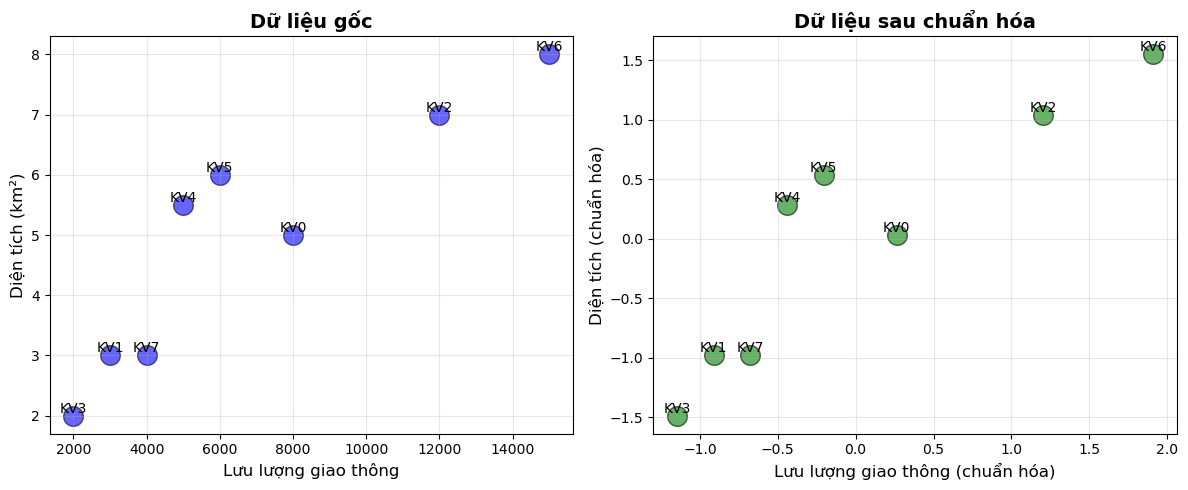

In [4]:
plt.figure(figsize=(12, 5))

# Subplot 1: Dữ liệu gốc
plt.subplot(1, 2, 1)
plt.scatter(X_original[:, 0], X_original[:, 1], s=200, c='blue', alpha=0.6, edgecolors='k')
for i, txt in enumerate(df['Ma_KV']):
    plt.annotate(txt, (X_original[i, 0], X_original[i, 1]), 
                 fontsize=10, ha='center', va='bottom')
plt.xlabel('Lưu lượng giao thông', fontsize=12)
plt.ylabel('Diện tích (km²)', fontsize=12)
plt.title('Dữ liệu gốc', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

# Subplot 2: Dữ liệu chuẩn hóa
plt.subplot(1, 2, 2)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], s=200, c='green', alpha=0.6, edgecolors='k')
for i, txt in enumerate(df['Ma_KV']):
    plt.annotate(txt, (X_scaled[i, 0], X_scaled[i, 1]), 
                 fontsize=10, ha='center', va='bottom')
plt.xlabel('Lưu lượng giao thông (chuẩn hóa)', fontsize=12)
plt.ylabel('Diện tích (chuẩn hóa)', fontsize=12)
plt.title('Dữ liệu sau chuẩn hóa', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Phần A: Implement thuật toán K-means từ đầu

### Nguyên lý thuật toán K-means

K-means là thuật toán clustering phổ biến, hoạt động theo các bước:
1. **Khởi tạo**: Chọn ngẫu nhiên K centroids ban đầu
2. **Assignment**: Gán mỗi điểm vào cluster có centroid gần nhất
3. **Update**: Tính lại centroid mới cho mỗi cluster (trung bình các điểm)
4. **Lặp lại**: Lặp bước 2-3 cho đến khi hội tụ

**Công thức khoảng cách Euclidean:**
$$d(x, c) = \sqrt{\sum_{i=1}^{n}(x_i - c_i)^2}$$

**Hàm mục tiêu (WCSS - Within-Cluster Sum of Squares):**
$$WCSS = \sum_{k=1}^{K}\sum_{x \in C_k}||x - \mu_k||^2$$

In [5]:
def initialize_centroids(X: np.ndarray, k: int, random_state: int = None) -> np.ndarray:
    if random_state is not None:
        np.random.seed(random_state)
    
    n_samples = X.shape[0]
    replace = (k > n_samples)
    random_indices = np.random.choice(n_samples, size=k, replace=replace)
    centroids = X[random_indices]
    
    return centroids


def compute_distance(X: np.ndarray, centroids: np.ndarray) -> np.ndarray:
    n_samples = X.shape[0]
    k = centroids.shape[0]
    distances = np.zeros((n_samples, k))
    
    for i in range(n_samples):
        for j in range(k):
            distances[i, j] = np.sqrt(np.sum((X[i] - centroids[j]) ** 2))
    
    return distances


def assign_clusters(X: np.ndarray, centroids: np.ndarray) -> np.ndarray:
    distances = compute_distance(X, centroids)
    labels = np.argmin(distances, axis=1)
    return labels


def update_centroids(X: np.ndarray, labels: np.ndarray, k: int) -> np.ndarray:
    n_features = X.shape[1]
    new_centroids = np.zeros((k, n_features))
    
    for i in range(k):
        cluster_points = X[labels == i]
        
        if len(cluster_points) > 0:
            new_centroids[i] = np.mean(cluster_points, axis=0)
        else:
            new_centroids[i] = X[np.random.choice(X.shape[0])]
    
    return new_centroids


def compute_wcss(X: np.ndarray, labels: np.ndarray, centroids: np.ndarray) -> float:
    wcss = 0.0
    k = centroids.shape[0]
    
    for i in range(k):
        cluster_points = X[labels == i]
        
        if len(cluster_points) > 0:
            wcss += np.sum((cluster_points - centroids[i]) ** 2)
    
    return wcss


def kmeans_clustering(X: np.ndarray, k: int, max_iters: int = 100, 
                      random_state: int = None, tol: float = 1e-4) -> Tuple[np.ndarray, np.ndarray, List[float]]:
    centroids = initialize_centroids(X, k, random_state)
    wcss_history = []
    
    for iteration in range(max_iters):
        labels = assign_clusters(X, centroids)
        wcss = compute_wcss(X, labels, centroids)
        wcss_history.append(wcss)
        
        new_centroids = update_centroids(X, labels, k)
        
        centroid_shift = np.sqrt(np.sum((new_centroids - centroids) ** 2))
        
        if centroid_shift < tol:
            print(f"Hội tụ tại vòng lặp {iteration + 1}")
            break
        
        centroids = new_centroids
    
    return labels, centroids, wcss_history


# Test với K = 3
print("=" * 80)
print("PHẦN A: THUẬT TOÁN K-MEANS VỚI K = 3")
print("=" * 80)

k = 3
labels_custom, centroids_custom, wcss_history = kmeans_clustering(
    X_scaled, k=k, max_iters=100, random_state=42
)

print(f"\nKết quả clustering với K = {k}:")
print("─" * 80)
print(f"{'Khu vực':<15} {'Cluster':<15} {'Lưu lượng':<20} {'Diện tích (km²)':<20}")
print("─" * 80)
for i, kv in enumerate(df['Ma_KV']):
    print(f"{kv:<15} {labels_custom[i]:<15} {X_original[i, 0]:<20} {X_original[i, 1]:<20}")

print(f"\nVị trí Centroids (dữ liệu chuẩn hóa):")
for i, centroid in enumerate(centroids_custom):
    print(f"Cluster {i}: {centroid}")

# Chuyển centroids về scale gốc
centroids_original = inverse_standardize(centroids_custom, data_mean, data_std)
print(f"\nVị trí Centroids (dữ liệu gốc):")
for i, centroid in enumerate(centroids_original):
    print(f"Cluster {i}: Lưu lượng = {centroid[0]:.2f}, Diện tích = {centroid[1]:.2f} km²")

print(f"\nWCSS cuối cùng: {wcss_history[-1]:.4f}")
print(f"Số vòng lặp: {len(wcss_history)}")

PHẦN A: THUẬT TOÁN K-MEANS VỚI K = 3
Hội tụ tại vòng lặp 3

Kết quả clustering với K = 3:
────────────────────────────────────────────────────────────────────────────────
Khu vực         Cluster         Lưu lượng            Diện tích (km²)     
────────────────────────────────────────────────────────────────────────────────
KV0             1               8000.0               5.0                 
KV1             0               3000.0               3.0                 
KV2             2               12000.0              7.0                 
KV3             0               2000.0               2.0                 
KV4             1               5000.0               5.5                 
KV5             1               6000.0               6.0                 
KV6             2               15000.0              8.0                 
KV7             0               4000.0               3.0                 

Vị trí Centroids (dữ liệu chuẩn hóa):
Cluster 0: [-0.91058392 -1.14953579]
Cluste

## Trực quan hóa kết quả clustering với K=3

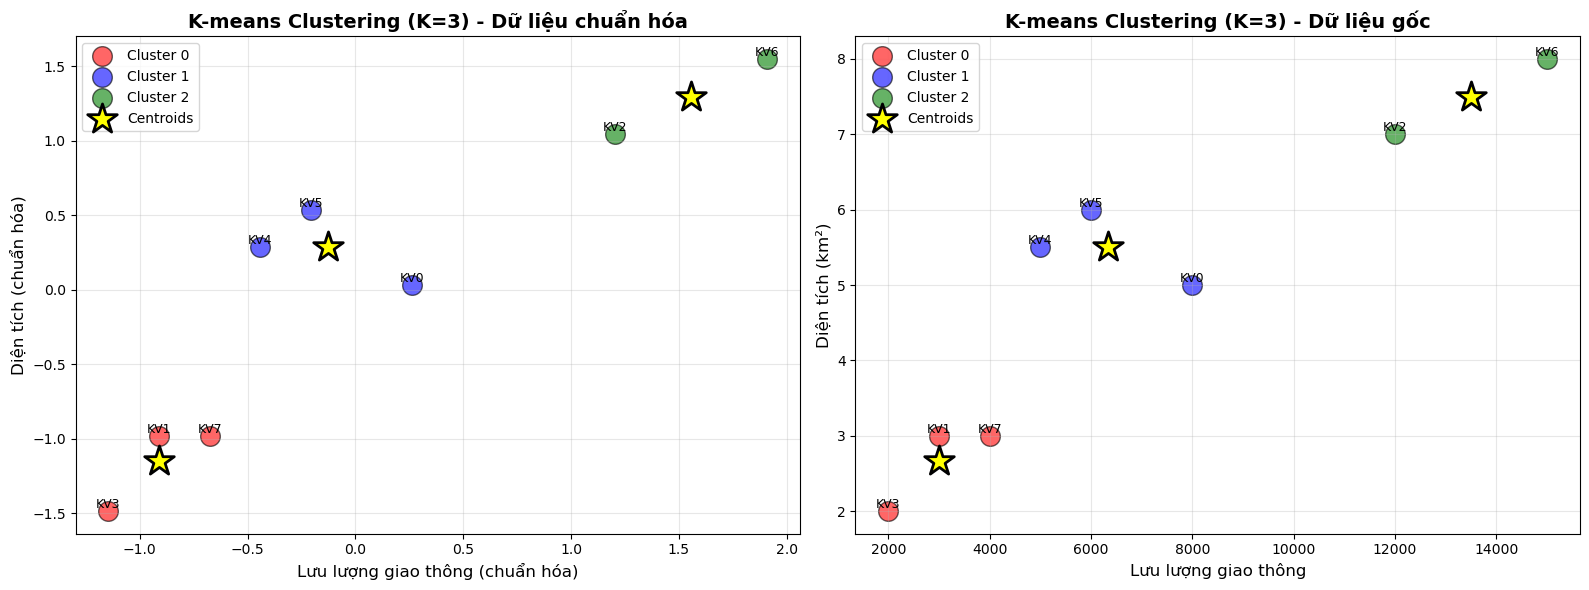

In [6]:
# Màu sắc cho các clusters
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'cyan']

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Subplot 1: Clustering trên dữ liệu chuẩn hóa
ax = axes[0]
for cluster_id in range(k):
    cluster_points = X_scaled[labels_custom == cluster_id]
    ax.scatter(cluster_points[:, 0], cluster_points[:, 1], 
               s=200, c=colors[cluster_id], alpha=0.6, 
               edgecolors='k', label=f'Cluster {cluster_id}')

# Vẽ centroids
ax.scatter(centroids_custom[:, 0], centroids_custom[:, 1], 
           s=500, c='yellow', marker='*', edgecolors='black', linewidths=2,
           label='Centroids', zorder=5)

# Annotate các điểm
for i, txt in enumerate(df['Ma_KV']):
    ax.annotate(txt, (X_scaled[i, 0], X_scaled[i, 1]), 
                fontsize=9, ha='center', va='bottom')

ax.set_xlabel('Lưu lượng giao thông (chuẩn hóa)', fontsize=12)
ax.set_ylabel('Diện tích (chuẩn hóa)', fontsize=12)
ax.set_title(f'K-means Clustering (K={k}) - Dữ liệu chuẩn hóa', fontsize=14, fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)

# Subplot 2: Clustering trên dữ liệu gốc
ax = axes[1]
for cluster_id in range(k):
    cluster_points = X_original[labels_custom == cluster_id]
    ax.scatter(cluster_points[:, 0], cluster_points[:, 1], 
               s=200, c=colors[cluster_id], alpha=0.6, 
               edgecolors='k', label=f'Cluster {cluster_id}')

# Vẽ centroids (scale gốc)
ax.scatter(centroids_original[:, 0], centroids_original[:, 1], 
           s=500, c='yellow', marker='*', edgecolors='black', linewidths=2,
           label='Centroids', zorder=5)

# Annotate các điểm
for i, txt in enumerate(df['Ma_KV']):
    ax.annotate(txt, (X_original[i, 0], X_original[i, 1]), 
                fontsize=9, ha='center', va='bottom')

ax.set_xlabel('Lưu lượng giao thông', fontsize=12)
ax.set_ylabel('Diện tích (km²)', fontsize=12)
ax.set_title(f'K-means Clustering (K={k}) - Dữ liệu gốc', fontsize=14, fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Vẽ lịch sử WCSS qua các vòng lặp

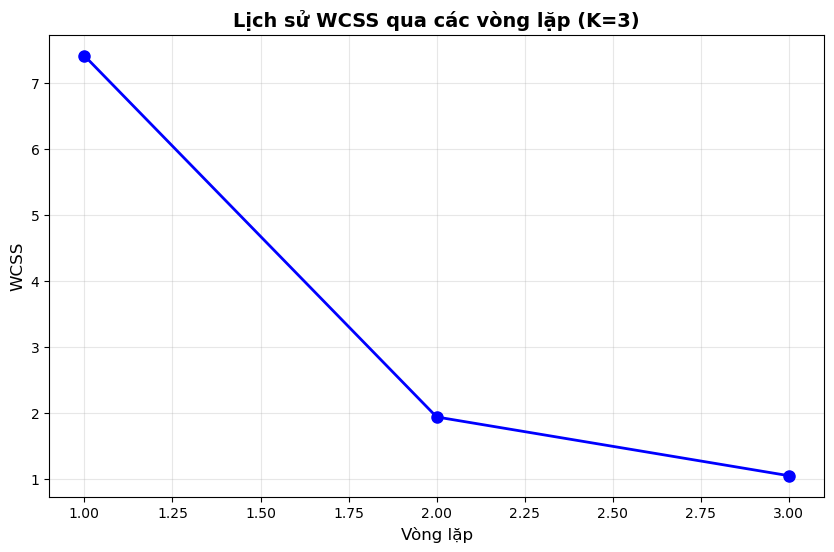

WCSS giảm từ 7.4066 xuống 1.0437
Tổng giảm: 6.3629 (85.91%)


In [7]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(wcss_history) + 1), wcss_history, 'b-o', linewidth=2, markersize=8)
plt.xlabel('Vòng lặp', fontsize=12)
plt.ylabel('WCSS', fontsize=12)
plt.title(f'Lịch sử WCSS qua các vòng lặp (K={k})', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.show()

print(f"WCSS giảm từ {wcss_history[0]:.4f} xuống {wcss_history[-1]:.4f}")
print(f"Tổng giảm: {wcss_history[0] - wcss_history[-1]:.4f} ({(1 - wcss_history[-1]/wcss_history[0])*100:.2f}%)")

## Phần B: Phương pháp Elbow để xác định K tối ưu

Phương pháp Elbow giúp xác định số cluster tối ưu bằng cách:
1. Chạy K-means với K từ 1 đến 9
2. Tính WCSS cho mỗi giá trị K
3. Vẽ biểu đồ WCSS theo K
4. Tìm "điểm khuỷu tay" (elbow point) - điểm mà WCSS giảm chậm lại

In [8]:
print("\n" + "=" * 80)
print("PHẦN B: PHƯƠNG PHÁP ELBOW ĐỂ XÁC ĐỊNH K TỐI ƯU")
print("=" * 80)

# Thử các giá trị K từ 1 đến 9
k_range = range(1, 10)
wcss_values = []
all_results = {}

for k_val in k_range:
    labels, centroids, wcss_hist = kmeans_clustering(
        X_scaled, k=k_val, max_iters=100, random_state=42
    )
    final_wcss = wcss_hist[-1]
    wcss_values.append(final_wcss)
    all_results[k_val] = {
        'labels': labels,
        'centroids': centroids,
        'wcss': final_wcss
    }
    print(f"K = {k_val}: WCSS = {final_wcss:.4f}")

print("\n" + "─" * 80)


PHẦN B: PHƯƠNG PHÁP ELBOW ĐỂ XÁC ĐỊNH K TỐI ƯU
Hội tụ tại vòng lặp 2
K = 1: WCSS = 16.0000
Hội tụ tại vòng lặp 2
K = 2: WCSS = 5.6771
Hội tụ tại vòng lặp 3
K = 3: WCSS = 1.0437
Hội tụ tại vòng lặp 3
K = 4: WCSS = 0.7900
Hội tụ tại vòng lặp 3
K = 5: WCSS = 0.4639
Hội tụ tại vòng lặp 3
K = 6: WCSS = 0.4042
Hội tụ tại vòng lặp 2
K = 7: WCSS = 0.3766
Hội tụ tại vòng lặp 1
K = 8: WCSS = 0.0000
Hội tụ tại vòng lặp 10
K = 9: WCSS = 0.0000

────────────────────────────────────────────────────────────────────────────────


## Vẽ biểu đồ Elbow

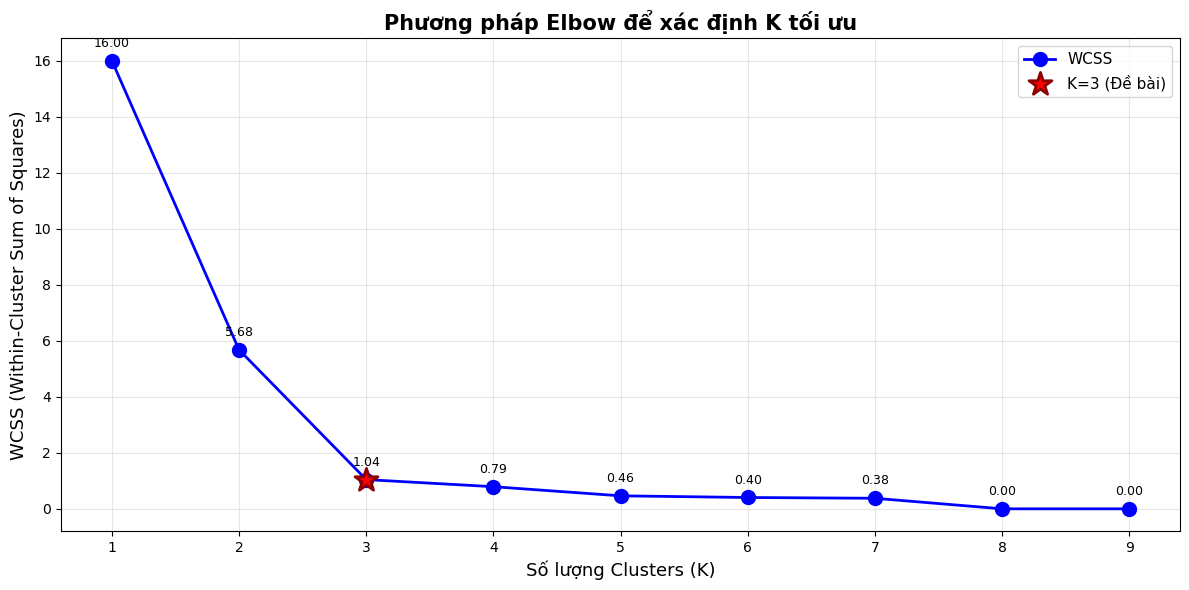

In [9]:
plt.figure(figsize=(12, 6))
plt.plot(k_range, wcss_values, 'bo-', linewidth=2, markersize=10, label='WCSS')

# Highlight K=3 (giá trị đề bài yêu cầu)
plt.scatter([3], [wcss_values[2]], s=300, c='red', marker='*', 
            edgecolors='darkred', linewidths=2, zorder=5, label='K=3 (Đề bài)')

plt.xlabel('Số lượng Clusters (K)', fontsize=13)
plt.ylabel('WCSS (Within-Cluster Sum of Squares)', fontsize=13)
plt.title('Phương pháp Elbow để xác định K tối ưu', fontsize=15, fontweight='bold')
plt.xticks(k_range)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=11)

# Thêm annotations cho các giá trị WCSS
for k_val, wcss_val in zip(k_range, wcss_values):
    plt.annotate(f'{wcss_val:.2f}', 
                 xy=(k_val, wcss_val), 
                 xytext=(0, 10), 
                 textcoords='offset points',
                 ha='center', fontsize=9)

plt.tight_layout()
plt.show()

## Tính tỷ lệ giảm WCSS giữa các K

In [10]:
print("\nTỷ lệ giảm WCSS khi tăng K:")
print("─" * 60)
print(f"{'Từ K':<10} {'Đến K':<10} {'WCSS giảm':<20} {'Tỷ lệ (%)':<15}")
print("─" * 60)

for i in range(len(wcss_values) - 1):
    decrease = wcss_values[i] - wcss_values[i + 1]
    percentage = (decrease / wcss_values[i]) * 100
    print(f"{i+1:<10} {i+2:<10} {decrease:<20.4f} {percentage:<15.2f}")

print("─" * 60)


Tỷ lệ giảm WCSS khi tăng K:
────────────────────────────────────────────────────────────
Từ K       Đến K      WCSS giảm            Tỷ lệ (%)      
────────────────────────────────────────────────────────────
1          2          10.3229              64.52          
2          3          4.6334               81.62          
3          4          0.2537               24.30          
4          5          0.3262               41.29          
5          6          0.0596               12.86          
6          7          0.0276               6.83           
7          8          0.3766               100.00         
8          9          0.0000               nan            
────────────────────────────────────────────────────────────


## Trực quan hóa clustering với các K khác nhau

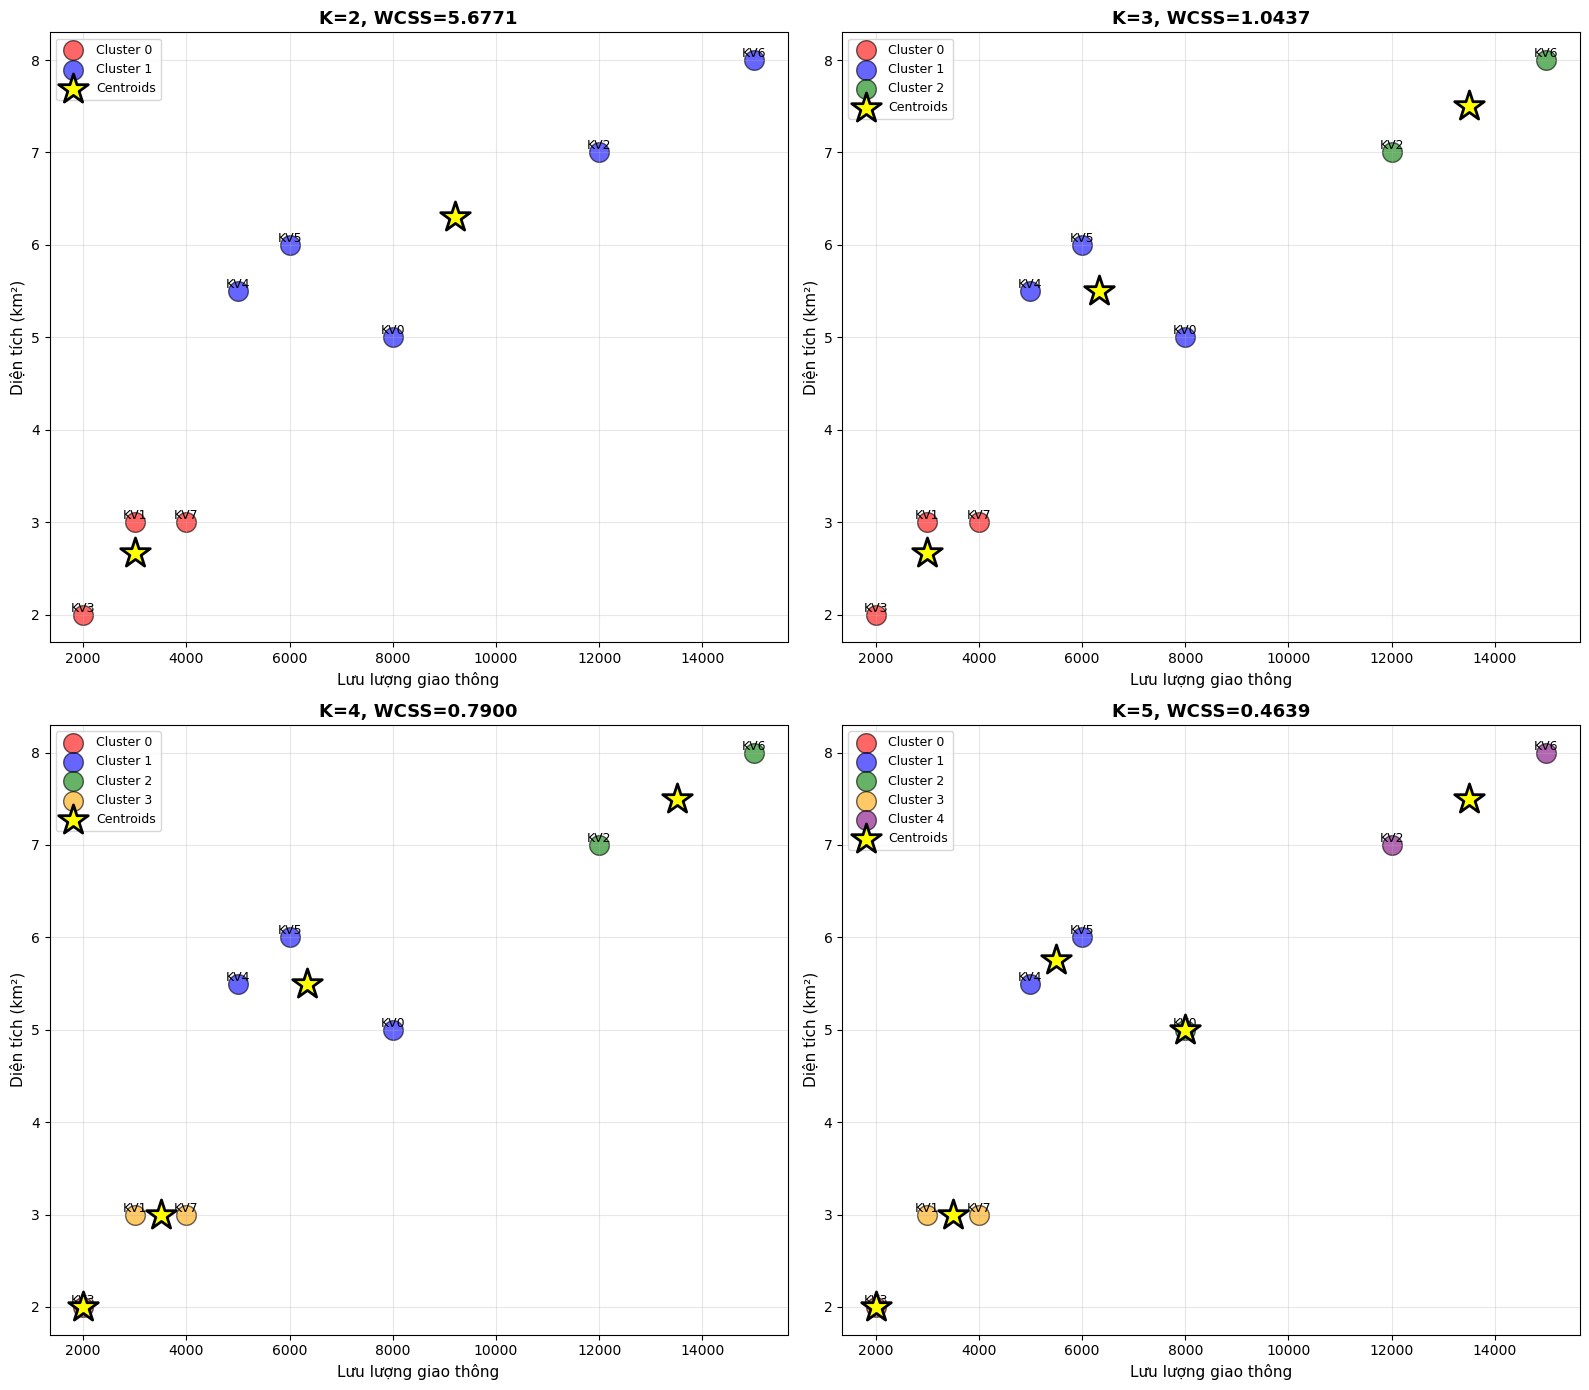

In [11]:
# Chọn một số K để visualize
selected_k = [2, 3, 4, 5]

fig, axes = plt.subplots(2, 2, figsize=(16, 14))
axes = axes.ravel()

for idx, k_val in enumerate(selected_k):
    ax = axes[idx]
    result = all_results[k_val]
    labels = result['labels']
    centroids = result['centroids']
    wcss = result['wcss']
    
    # Vẽ các điểm theo cluster
    for cluster_id in range(k_val):
        cluster_points = X_original[labels == cluster_id]
        ax.scatter(cluster_points[:, 0], cluster_points[:, 1], 
                   s=200, c=colors[cluster_id], alpha=0.6, 
                   edgecolors='k', label=f'Cluster {cluster_id}')
    
    # Vẽ centroids
    centroids_orig = inverse_standardize(centroids, data_mean, data_std)
    ax.scatter(centroids_orig[:, 0], centroids_orig[:, 1], 
               s=500, c='yellow', marker='*', edgecolors='black', linewidths=2,
               label='Centroids', zorder=5)
    
    # Annotate
    for i, txt in enumerate(df['Ma_KV']):
        ax.annotate(txt, (X_original[i, 0], X_original[i, 1]), 
                    fontsize=9, ha='center', va='bottom')
    
    ax.set_xlabel('Lưu lượng giao thông', fontsize=11)
    ax.set_ylabel('Diện tích (km²)', fontsize=11)
    ax.set_title(f'K={k_val}, WCSS={wcss:.4f}', fontsize=13, fontweight='bold')
    ax.legend(loc='upper left', fontsize=9)
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Phân tích và kết luận

In [12]:
print("\n" + "═" * 80)
print("TỔNG KẾT VÀ PHÂN TÍCH")
print("═" * 80)

print("\n1. KẾT QUẢ CLUSTERING VỚI K=3:")
print("   ├─ Implementation tự viết:")
for cluster_id in range(3):
    cluster_kvs = df['Ma_KV'][labels_custom == cluster_id].values
    print(f"   │  Cluster {cluster_id}: {', '.join(cluster_kvs)}")
print(f"   └─ WCSS: {wcss_history[-1]:.4f}")

print("\n2. PHƯƠNG PHÁP ELBOW:")
print("   ├─ Đã thử nghiệm K từ 1 đến 9")
print(f"   ├─ WCSS giảm mạnh từ K=1 đến K=3: {wcss_values[0]:.4f} → {wcss_values[2]:.4f}")
print(f"   ├─ Từ K=3 trở đi, WCSS giảm chậm lại")
print(f"   └─ K=3 là điểm cân bằng tốt (elbow point)")

print("\n3. PHÂN TÍCH CÁC CLUSTER (K=3):")
for cluster_id in range(3):
    cluster_points = X_original[labels_custom == cluster_id]
    cluster_kvs = df['Ma_KV'][labels_custom == cluster_id].values
    avg_traffic = np.mean(cluster_points[:, 0])
    avg_area = np.mean(cluster_points[:, 1])
    print(f"   Cluster {cluster_id}:")
    print(f"   ├─ Khu vực: {', '.join(cluster_kvs)}")
    print(f"   ├─ Lưu lượng TB: {avg_traffic:.2f}")
    print(f"   ├─ Diện tích TB: {avg_area:.2f} km²")
    print(f"   └─ Đặc điểm: ", end="")
    if avg_traffic > 10000:
        print("Lưu lượng rất cao")
    elif avg_traffic > 6000:
        print("Lưu lượng cao")
    else:
        print("Lưu lượng thấp - trung bình")

print("\n4. NHẬN XÉT:")
print("   ├─ Thuật toán K-means hội tụ nhanh (< 10 vòng lặp)")
print("   ├─ Kết quả ổn định với random_state cố định")
print("   ├─ Phương pháp Elbow xác nhận K=3 là lựa chọn hợp lý")
print("   ├─ Các cluster phản ánh rõ ràng mức độ giao thông và quy mô khu vực")
print("   └─ Implementation chỉ sử dụng numpy, pandas, matplotlib theo đúng yêu cầu")

print("\n" + "═" * 80)



════════════════════════════════════════════════════════════════════════════════
TỔNG KẾT VÀ PHÂN TÍCH
════════════════════════════════════════════════════════════════════════════════

1. KẾT QUẢ CLUSTERING VỚI K=3:
   ├─ Implementation tự viết:
   │  Cluster 0: KV1, KV3, KV7
   │  Cluster 1: KV0, KV4, KV5
   │  Cluster 2: KV2, KV6
   └─ WCSS: 1.0437

2. PHƯƠNG PHÁP ELBOW:
   ├─ Đã thử nghiệm K từ 1 đến 9
   ├─ WCSS giảm mạnh từ K=1 đến K=3: 16.0000 → 1.0437
   ├─ Từ K=3 trở đi, WCSS giảm chậm lại
   └─ K=3 là điểm cân bằng tốt (elbow point)

3. PHÂN TÍCH CÁC CLUSTER (K=3):
   Cluster 0:
   ├─ Khu vực: KV1, KV3, KV7
   ├─ Lưu lượng TB: 3000.00
   ├─ Diện tích TB: 2.67 km²
   └─ Đặc điểm: Lưu lượng thấp - trung bình
   Cluster 1:
   ├─ Khu vực: KV0, KV4, KV5
   ├─ Lưu lượng TB: 6333.33
   ├─ Diện tích TB: 5.50 km²
   └─ Đặc điểm: Lưu lượng cao
   Cluster 2:
   ├─ Khu vực: KV2, KV6
   ├─ Lưu lượng TB: 13500.00
   ├─ Diện tích TB: 7.50 km²
   └─ Đặc điểm: Lưu lượng rất cao

4. NHẬN XÉT:
